## Parser for .res files

In [71]:
import json
added_lines = []

with open("dfvs.jar.res", 'r') as f:
    lines = f.readlines()
    data = {}
    for line in lines:

        temp = {}

        if 'correct' in line:
            split_arr = line.split('\t')
            time = split_arr[1].strip().split(' ')[0]
            temp['t'] = float(time[time.index(':')+1:]) + 60*float(time[:time.index(':')])
            temp['k'] = int(split_arr[2][1:split_arr[2].index(',')])
        else:
            continue
            
        if 'complex' in line:
            temp['c'] = 'complex'
        elif 'synthetic' in line:
            temp['c'] = 'synthetic'
        else:
            temp['c'] = 'unknown'

        name = line[line.index(temp['c'] + '/')+len(temp['c'])+1: line.index(' ')]

        if name in added_lines:
            continue
        added_lines.append(name)

        temp['n'] = int(name[name.index('-n_')+3: name.index('-m_')])
        
        if '-p_' not in name:
            if '.mtx' in name:
                temp['m'] = int(name[name.index('-m_')+3: name.index('.mtx')])
            else:
                    temp['m'] = int(name[name.index('-m_')+3:])
        else:
            if '-k_'in name:
                temp['m'] = int(name[name.index('-m_')+3: name.index('-k_')])
            else:
                temp['m'] = int(name[name.index('-m_')+3: name.index('-p_')])
    
        data[name] = temp

with open('result.json', 'w') as f:
    json.dump(data, f)

Text(0, 0.5, 'number of edges')

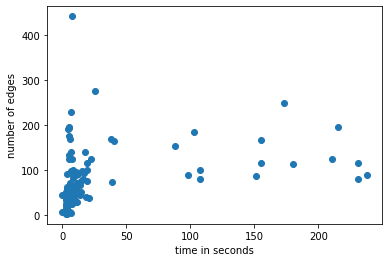

In [78]:
import json
import matplotlib.pyplot as plt
import pandas as pd

with open('result.json', 'r') as f:
    data = json.loads(f.read())

df = pd.DataFrame(data).transpose()
df.columns = ['t', 'k', 'class', 'n', 'm']

plt.scatter(df['t'], df['m'])
plt.xlabel('time in seconds')
plt.ylabel('number of edges')

In [69]:
time = " 3:00.0 1241"
time.strip().split(' ')

['3:00.0', '1241']